In [30]:
import torch
from gen_model_playground.fit.ddpm import DDPM
from gen_model_playground.data.twomoons import TwoMoonsDataModule
from matplotlib import pyplot as plt
import os
hparams={ 'name': 'ddpm',
 'max_epochs': 50,
 'num_batches': 1000,
 'lr': 0.0001,
 'ema': False,
 'decay': 0.999,
 'ema_start': 10000,
 'gan_type': 'lsgan',
 'gp': False,
 'gp_value': 1,
 'spectral': False,
 'residual': True,
 'batch_norm': True,
 'fm': False,
 'bias_gen': True,
 'bias_dis': True,
 'batch_size': 256,
 'num_blocks': 2,
 'hidden_features': 128,
 'in_features': 2,
 'out_features': 2,
 'cond_features': 0,
 'num_bins': 8,
 'tail_bound': 4,
 'n_coupling': 16,
 'flow_type': 'RQS',
 'matching': 'exact',
 'num_steps': 100,
 'encoding_dim': 2,
 'time_features': 1}
ddpm = DDPM(**hparams)
datamodule=TwoMoonsDataModule(num_batches=100, batch_size=100)
datamodule.setup()
data=[]
labels=[]
noised=[]
ddpm=ddpm.to("cpu")
ddpm.baralphas=ddpm.baralphas.to("cpu")


In [31]:
for x,y in datamodule.train_dataloader():
    data.append(x)
    labels.append(y)
    noised.append(ddpm.noise(x, torch.ones((len(x[:,:1]),1),device=ddpm.device)*(ddpm.hparams.num_steps-1))[0])
data=torch.cat(data).cpu().numpy()
labels=torch.cat(labels).cpu().numpy()
noised=torch.cat(noised).cpu().numpy()

/tmp/ipykernel_25857/107559892.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[labels==1,0],data[labels==1,1],cmap=cmap,alpha=0.003)
/tmp/ipykernel_25857/107559892.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[labels==0,0],data[labels==0,1],cmap=cmap,alpha=0.003)


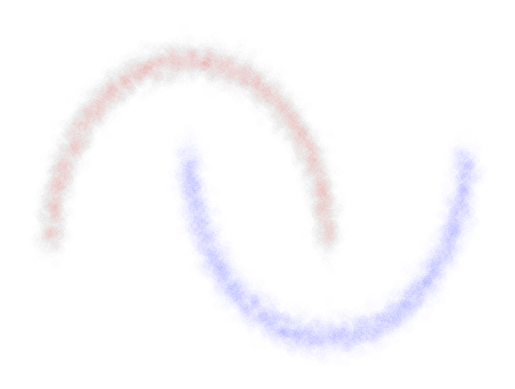

/tmp/ipykernel_25857/107559892.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(noised[labels==1,0],noised[labels==1,1],cmap=cmap,alpha=0.01)
/tmp/ipykernel_25857/107559892.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(noised[labels==0,0],noised[labels==0,1],cmap=cmap,alpha=0.01)


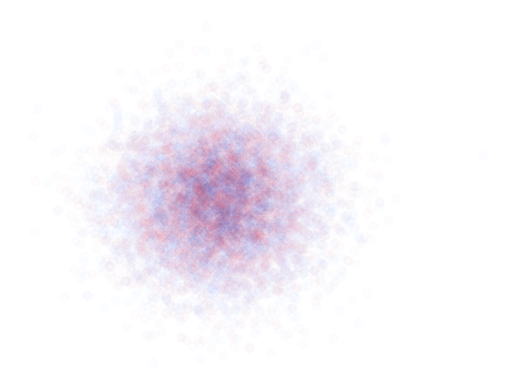

In [34]:
from my_cmaps import cmap
plt.scatter(data[labels==1,0],data[labels==1,1],cmap=cmap,alpha=0.003)
plt.scatter(data[labels==0,0],data[labels==0,1],cmap=cmap,alpha=0.003)
plt.axis('off')

plt.show()

plt.scatter(noised[labels==1,0],noised[labels==1,1],cmap=cmap,alpha=0.01)
plt.scatter(noised[labels==0,0],noised[labels==0,1],cmap=cmap,alpha=0.01)
plt.axis('off')

os.makedirs("../gen_model_playground/plots/ddpm",exist_ok=True)
plt.savefig("../gen_model_playground/plots/ddpm/forward_diffusion.pdf")
plt.show()